In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df=pd.read_csv('/content/real_estate_main.csv')

In [138]:
df.head()

,Unnamed: 0,Name,Price,Rate,property,carpet.area,status,floor,transaction,facing,...,ownership,parking,bathroom,balcony,city,location,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,"4 BHK Flat for Sale in Vasant Vihar, New Delhi",85000000,₹21250 per sqft,Parnami Infra,3000 sqft,Ready to Move,2 out of 4,Resale,North - East,...,Freehold,"2 Covered,",5.0,3.0,Delhi,Vasant Vihar,21250.0,4,3000.0,4000.000000
1,2,"4 BHK Flat for Sale in Sushant Lok-I, Sector 4...",26500000,₹9815 per sqft,Dolphin Real Estates,1500 sqft,Ready to Move,Ground out of 4,New Property,North - West,...,Freehold,1 Covered,4.0,3.0,Gurgaon,Sushant Lok-I,9815.0,4,1500.0,2699.949058
2,3,"3 BHK Flat for Sale in DLF City Phase 2, Gurgaon",29500000,₹15245 per sqft,The Unique Realty,144 sqyrd,Ready to Move,1 out of 4,New Property,North,...,Freehold,"1 Covered,",3.0,2.0,Gurgaon,DLF City Phase 2,15245.0,3,144.0,1935.060676
3,4,"3 BHK Flat for Sale in Rohini Sector 24, New D...",12100000,₹10083 per sqft,Iconic Realty,1100 sqft,Ready to Move,1 out of 4,New Property,North - East,...,Freehold,"1 Covered,",2.0,1.0,Delhi,Rohini Sector 24,10083.0,3,1100.0,1200.039671
4,5,"3 BHK Flat for Sale in Rohini Sector 8, New Delhi",25000000,₹31250 per sqft,Synergy Real Estates,750 sqft,Ready to Move,2 out of 4,New Property,East,...,Leasehold,1 Covered,3.0,1.0,Delhi,Rohini Sector 8,31250.0,3,750.0,800.000000


In [139]:
df.shape

(2345, 21)

In [140]:
data_types_all_columns=df.dtypes
data_types_all_columns

Unnamed: 0            int64
Name                 object
Price                 int64
Rate                 object
property             object
carpet.area          object
status               object
floor                object
transaction          object
facing               object
overlooking          object
ownership            object
parking              object
bathroom            float64
balcony             float64
city                 object
location             object
Rate_per_sqft       float64
bedroom               int64
carpet_area_sqft    float64
total_area          float64
dtype: object

In [141]:
 df1= df.select_dtypes(exclude='object')

In [142]:
df1.shape


(2345, 8)

In [143]:
df1.head(2)

,Unnamed: 0,Price,bathroom,balcony,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,85000000,5.0,3.0,21250.0,4,3000.0,4000.000000
1,2,26500000,4.0,3.0,9815.0,4,1500.0,2699.949058


In [144]:
df1.isnull().sum()


Unnamed: 0             0
Price                  0
bathroom              25
balcony              824
Rate_per_sqft         88
bedroom                0
carpet_area_sqft    1147
total_area            88
dtype: int64

In [145]:
median_value = df1['carpet_area_sqft'].median()
df1['carpet_area_sqft'].fillna(value=median_value, inplace=True)


In [146]:
median_value = df1['balcony'].median()
df1['balcony'].fillna(value=median_value, inplace=True)

In [147]:
df2=df1.dropna()

In [148]:
df2.isnull().sum()

Unnamed: 0          0
Price               0
bathroom            0
balcony             0
Rate_per_sqft       0
bedroom             0
carpet_area_sqft    0
total_area          0
dtype: int64

In [149]:
df2.head()

,Unnamed: 0,Price,bathroom,balcony,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,85000000,5.0,3.0,21250.0,4,3000.0,4000.000000
1,2,26500000,4.0,3.0,9815.0,4,1500.0,2699.949058
2,3,29500000,3.0,2.0,15245.0,3,144.0,1935.060676
3,4,12100000,2.0,1.0,10083.0,3,1100.0,1200.039671
4,5,25000000,3.0,1.0,31250.0,3,750.0,800.000000


In [186]:
# Assuming df2 is your DataFrame
for column in df2.columns:
    q1 = df2[column].quantile(0.25)
    q3 = df2[column].quantile(0.75)
    iqr = q3 - q1
    LL = q1 - 1.5 * iqr
    UL = q3 + 1.5 * iqr

    # Remove rows with outliers in the current column
    df3 = df2[~((df2[column] < LL) | (df2[column] > UL))]


In [189]:
# Confirming df3 is without outliers
num_var = df3.select_dtypes(exclude='object')
for i in num_var:
    q1 = df3[i].quantile(0.25)
    q3 = df3[i].quantile(0.75)
    IQR = q3 - q1
    UL = q3 + 1.5 * IQR
    LL = q1 - 1.5 * IQR
    print('Number of Outliers in dataset df3', i, ' = ', (df3.shape[0] - df3[(df3[i] < UL) | (df3[i] > LL)].shape[0]))
    print(' ')


Number of Outliers in dataset df3 Unnamed: 0  =  0
 
Number of Outliers in dataset df3 Price  =  0
 
Number of Outliers in dataset df3 bathroom  =  0
 
Number of Outliers in dataset df3 balcony  =  0
 
Number of Outliers in dataset df3 Rate_per_sqft  =  0
 
Number of Outliers in dataset df3 bedroom  =  0
 
Number of Outliers in dataset df3 carpet_area_sqft  =  0
 
Number of Outliers in dataset df3 total_area  =  0
 


In [188]:
df3.isnull().sum()  #no null values

Unnamed: 0          0
Price               0
bathroom            0
balcony             0
Rate_per_sqft       0
bedroom             0
carpet_area_sqft    0
total_area          0
dtype: int64

In [190]:
df3.shape

(2025, 8)

In [191]:
df2.shape

(2240, 8)

In [193]:
df3.head()

,Unnamed: 0,Price,bathroom,balcony,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,85000000,5.0,3.0,21250.0,4,3000.0,4000.000000
1,2,26500000,4.0,3.0,9815.0,4,1500.0,2699.949058
2,3,29500000,3.0,2.0,15245.0,3,144.0,1935.060676
3,4,12100000,2.0,1.0,10083.0,3,1100.0,1200.039671
4,5,25000000,3.0,1.0,31250.0,3,750.0,800.000000


In [202]:
df3.corr()

,Unnamed: 0,Price,bathroom,balcony,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
Unnamed: 0,1.000000,-0.094293,-0.083893,-0.110389,0.001436,-0.041845,-0.071743,-0.092705
Price,-0.094293,1.000000,0.576184,0.074434,0.370638,0.505735,0.069420,0.599639
bathroom,-0.083893,0.576184,1.000000,0.121231,0.094963,0.750167,0.045540,0.596086
balcony,-0.110389,0.074434,0.121231,1.000000,-0.003462,0.092045,0.104161,0.103564
Rate_per_sqft,0.001436,0.370638,0.094963,-0.003462,1.000000,0.120775,0.002545,-0.056373
bedroom,-0.041845,0.505735,0.750167,0.092045,0.120775,1.000000,0.033533,0.591388
carpet_area_sqft,-0.071743,0.069420,0.045540,0.104161,0.002545,0.033533,1.000000,0.068442
total_area,-0.092705,0.599639,0.596086,0.103564,-0.056373,0.591388,0.068442,1.000000


In [206]:
df4 = pd.concat([df, df3.select_dtypes(include='number')], axis=1)
df4

,Unnamed: 0,Name,Price,Rate,property,carpet.area,status,floor,transaction,facing,...,carpet_area_sqft,total_area,Unnamed: 0,Price,bathroom,balcony,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,"4 BHK Flat for Sale in Vasant Vihar, New Delhi",85000000,₹21250 per sqft,Parnami Infra,3000 sqft,Ready to Move,2 out of 4,Resale,North - East,...,3000.0,4000.000000,1.0,85000000.0,5.0,3.0,21250.0,4.0,3000.0,4000.000000
1,2,"4 BHK Flat for Sale in Sushant Lok-I, Sector 4...",26500000,₹9815 per sqft,Dolphin Real Estates,1500 sqft,Ready to Move,Ground out of 4,New Property,North - West,...,1500.0,2699.949058,2.0,26500000.0,4.0,3.0,9815.0,4.0,1500.0,2699.949058
2,3,"3 BHK Flat for Sale in DLF City Phase 2, Gurgaon",29500000,₹15245 per sqft,The Unique Realty,144 sqyrd,Ready to Move,1 out of 4,New Property,North,...,144.0,1935.060676,3.0,29500000.0,3.0,2.0,15245.0,3.0,144.0,1935.060676
3,4,"3 BHK Flat for Sale in Rohini Sector 24, New D...",12100000,₹10083 per sqft,Iconic Realty,1100 sqft,Ready to Move,1 out of 4,New Property,North - East,...,1100.0,1200.039671,4.0,12100000.0,2.0,1.0,10083.0,3.0,1100.0,1200.039671
4,5,"3 BHK Flat for Sale in Rohini Sector 8, New Delhi",25000000,₹31250 per sqft,Synergy Real Estates,750 sqft,Ready to Move,2 out of 4,New Property,East,...,750.0,800.000000,5.0,25000000.0,3.0,1.0,31250.0,3.0,750.0,800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2987,"3 BHK Flat for Sale in Amrapali Empire, NH 24,...",6500000,₹3939 per sqft,NaN,NaN,Ready to Move,15 out of 20,Resale,NaN,...,NaN,1650.165017,2987.0,6500000.0,3.0,2.0,3939.0,3.0,1150.0,1650.165017
2341,2990,"3 BHK Flat for Sale in Sethi Max Royal, Sector...",15500000,₹7381 per sqft,NaN,NaN,Ready to Move,14 out of 22,New Property,NaN,...,NaN,2099.986452,2990.0,15500000.0,3.0,2.0,7381.0,3.0,1150.0,2099.986452
2342,2991,2 BHK Flat for Sale in Indarparstha Colony Par...,4200000,₹5185 per sqft,NaN,NaN,Ready to Move,4 out of 4,Resale,NaN,...,NaN,810.028930,2991.0,4200000.0,2.0,2.0,5185.0,2.0,1150.0,810.028930
2343,2993,"3 BHK Flat for Sale in The Retreat, South City...",20000000,₹11765 per sqft,NaN,NaN,Ready to Move,3 out of 11,Resale,NaN,...,NaN,1699.957501,2993.0,20000000.0,3.0,2.0,11765.0,3.0,1150.0,1699.957501


In [209]:
common_columns = set(df.columns) & set(df3.columns)

# Drop common columns from df3
df3_excluded = df3.drop(columns=common_columns)

# Concatenate df and df3_excluded along the columns axis
df5 = pd.concat([df, df3_excluded], axis=1)

df5.head(2)

,Unnamed: 0,Name,Price,Rate,property,carpet.area,status,floor,transaction,facing,...,ownership,parking,bathroom,balcony,city,location,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,"4 BHK Flat for Sale in Vasant Vihar, New Delhi",85000000,₹21250 per sqft,Parnami Infra,3000 sqft,Ready to Move,2 out of 4,Resale,North - East,...,Freehold,"2 Covered,",5.0,3.0,Delhi,Vasant Vihar,21250.0,4,3000.0,4000.000000
1,2,"4 BHK Flat for Sale in Sushant Lok-I, Sector 4...",26500000,₹9815 per sqft,Dolphin Real Estates,1500 sqft,Ready to Move,Ground out of 4,New Property,North - West,...,Freehold,1 Covered,4.0,3.0,Gurgaon,Sushant Lok-I,9815.0,4,1500.0,2699.949058


In [233]:
df5.drop('Rate', axis=1, inplace=True)
df5.head(2)

,Unnamed: 0,Name,Price,property,status,floor,transaction,facing,overlooking,ownership,parking,bathroom,balcony,city,location,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
0,1,"4 BHK Flat for Sale in Vasant Vihar, New Delhi",85000000,Parnami Infra,Ready to Move,2 out of 4,Resale,North - East,Garden/Park,Freehold,"2 Covered,",5.0,3.0,Delhi,Vasant Vihar,21250.0,4,3000.0,4000.000000
1,2,"4 BHK Flat for Sale in Sushant Lok-I, Sector 4...",26500000,Dolphin Real Estates,Ready to Move,Ground out of 4,New Property,North - West,Main Road,Freehold,1 Covered,4.0,3.0,Gurgaon,Sushant Lok-I,9815.0,4,1500.0,2699.949058


In [225]:
df5.dtypes

Unnamed: 0            int64
Name                 object
Price                 int64
Rate                float64
property             object
status               object
floor                object
transaction          object
facing               object
overlooking          object
ownership            object
parking              object
bathroom            float64
balcony             float64
city                 object
location             object
Rate_per_sqft       float64
bedroom               int64
carpet_area_sqft    float64
total_area          float64
dtype: object

In [234]:
df5['location'].unique()
df5['city'].unique()
df5['parking'].unique()

array(['2 Covered,', '1 Covered', '1 Covered,', '4 Covered', '3 Covered,',
       '2 Covered', '3 Covered', '5 Open', nan, '2 Open', '1 Open',
       '4 Covered,', '5 Covered', '3 Open', '5 Covered,', '10 Covered,',
       '8 Covered,', '4 Open', '100 Open', '112 Covered', '606 Open',
       '11 Covered', '12 Covered', '10 Covered', '344 Covered',
       '15 Covered', '59 Covered', '104 Covered'], dtype=object)

In [229]:
df5.corr()

<ipython-input-229-d0269aa5c0fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.corr()


,Unnamed: 0,Price,Rate,bathroom,balcony,Rate_per_sqft,bedroom,carpet_area_sqft,total_area
Unnamed: 0,1.000000,-0.061651,-0.003802,-0.072428,-0.091000,-0.003802,-0.038621,-0.082056,-0.004468
Price,-0.061651,1.000000,0.202910,0.433835,0.070493,0.202910,0.427088,0.176824,0.643814
Rate,-0.003802,0.202910,1.000000,0.079795,0.012804,1.000000,0.096519,0.058948,-0.031707
bathroom,-0.072428,0.433835,0.079795,1.000000,0.147391,0.079795,0.763958,0.075404,0.251697
balcony,-0.091000,0.070493,0.012804,0.147391,1.000000,0.012804,0.101133,0.107662,0.085414
Rate_per_sqft,-0.003802,0.202910,1.000000,0.079795,0.012804,1.000000,0.096519,0.058948,-0.031707
bedroom,-0.038621,0.427088,0.096519,0.763958,0.101133,0.096519,1.000000,0.084450,0.270427
carpet_area_sqft,-0.082056,0.176824,0.058948,0.075404,0.107662,0.058948,0.084450,1.000000,0.037000
total_area,-0.004468,0.643814,-0.031707,0.251697,0.085414,-0.031707,0.270427,0.037000,1.000000


<ipython-input-235-cf82d784ef13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df5.corr()


Index(['Unnamed: 0', 'Price', 'bathroom', 'balcony', 'Rate_per_sqft',
       'bedroom', 'carpet_area_sqft', 'total_area'],
      dtype='object')


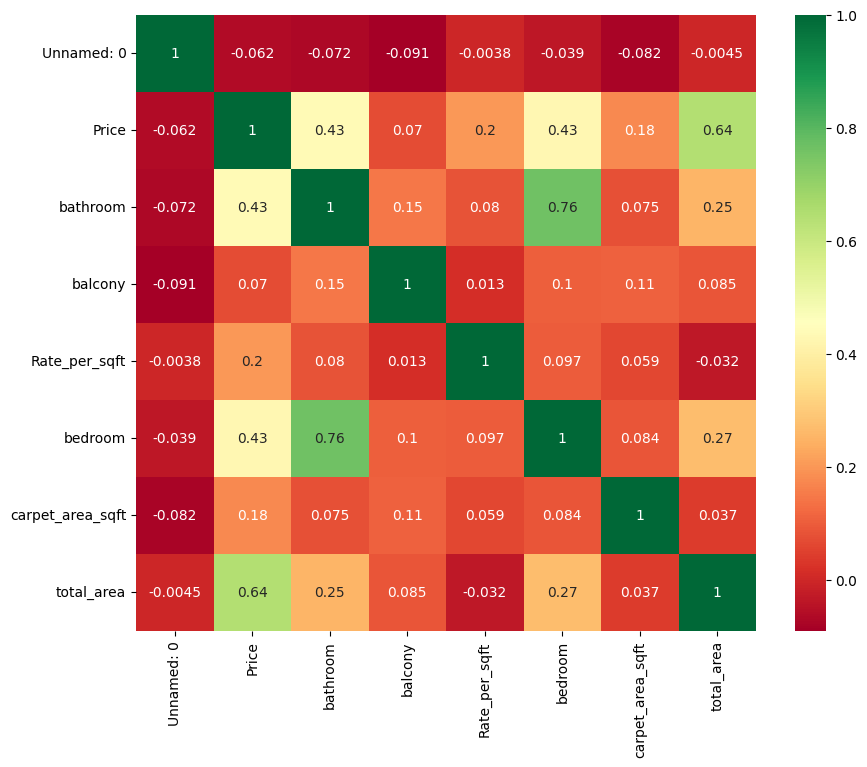

In [235]:
corrmat = df5.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(top_corr_features)